This notebook contains the analysis of the **"previous_application"** dataset considering a sample data size of first 30,000 rows of data...

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Installing necessary libraries into the python environment
!pip install --upgrade -q gspread

In [0]:
# Getting necessary permissions from user to access google credentials

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [19]:
# Reading the modified previous_application.csv dataset by taking a sample size of 30,000 rows of data
# Making a data-frame named df2 to store the dataset
spreadsheet2 = gc.open_by_url('https://docs.google.com/spreadsheets/d/13H5iZiTX5lbH146EwT4R8Wyyopka7DK620ZcCQkjQlc/edit#gid=410992393')
sheet2 =  spreadsheet2.get_worksheet(0)
df2 = pd.DataFrame(sheet2.get_all_records())
df2.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,CHANNEL_TYPE,CNT_PAYMENT,CODE_REJECT_REASON,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_TERMINATION,FLAG_LAST_APPL_PER_CONTRACT,HOUR_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,NAME_CLIENT_TYPE,NAME_CONTRACT_STATUS,NAME_CONTRACT_TYPE,NAME_GOODS_CATEGORY,NAME_PAYMENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,NAME_SELLER_INDUSTRY,NAME_TYPE_SUITE,NAME_YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL,NFLAG_LAST_APPL_IN_DAY,PRODUCT_COMBINATION,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,SELLERPLACE_AREA,SK_ID_CURR,SK_ID_PREV,WEEKDAY_APPR_PROCESS_START
0,1730.43,17145.0,17145.0,0,17145,Country-wide,12,XAP,-73,365243,-42,-42,300,-37,Y,15,XAP,Repeater,Approved,Consumer loans,Mobile,Cash through the bank,POS,XNA,Connectivity,,middle,0,1,POS mobile with interest,0,0.182832,0.867336,35,271877,2030495,SATURDAY
1,25188.6,607500.0,679671.0,,607500,Contact center,36,XAP,-164,365243,-134,365243,916,365243,Y,11,XNA,Repeater,Approved,Cash loans,XNA,XNA,Cash,x-sell,XNA,Unaccompanied,low_action,1,1,Cash X-Sell: low,,,,-1,108129,2802425,THURSDAY
2,15060.7,112500.0,136444.5,,112500,Credit and cash offices,12,XAP,-301,365243,-271,365243,59,365243,Y,11,XNA,Repeater,Approved,Cash loans,XNA,Cash through the bank,Cash,x-sell,XNA,"Spouse, partner",high,1,1,Cash X-Sell: high,,,,-1,122040,2523466,TUESDAY
3,47041.3,450000.0,470790.0,,450000,Credit and cash offices,12,XAP,-512,365243,-482,-182,-152,-177,Y,7,XNA,Repeater,Approved,Cash loans,XNA,Cash through the bank,Cash,x-sell,XNA,,middle,1,1,Cash X-Sell: middle,,,,-1,176158,2819243,MONDAY
4,31924.4,337500.0,404055.0,,337500,Credit and cash offices,24,HC,-781,,,,,,Y,9,Repairs,Repeater,Refused,Cash loans,XNA,Cash through the bank,Cash,walk-in,XNA,,high,,1,Cash Street: high,,,,-1,202054,1784265,THURSDAY


In [0]:
# Getting the shape of the dataset, i.e., no. of rows & columns in the dataset
df2.shape

(30000, 37)

In [0]:
# Describing the properties of the dataset
df2.describe()

,AMT_APPLICATION,AMT_CREDIT,DAYS_DECISION,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,SELLERPLACE_AREA,SK_ID_CURR,SK_ID_PREV
count,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,3.000000e+04
mean,1.685651e+05,1.881158e+05,-907.416300,12.479133,0.996867,4.671433e+02,278804.124800,1.920259e+06
std,2.816287e+05,3.086342e+05,788.728356,3.330776,0.055889,2.313088e+04,102755.009784,5.354031e+05
min,0.000000e+00,0.000000e+00,-2922.000000,0.000000,0.000000,-1.000000e+00,100007.000000,1.000009e+06
25%,2.245500e+04,2.648588e+04,-1355.000000,10.000000,1.000000,-1.000000e+00,189589.000000,1.455869e+06
50%,7.195500e+04,7.908525e+04,-607.000000,12.000000,1.000000,1.500000e+01,278329.500000,1.917674e+06
75%,1.800000e+05,1.952348e+05,-295.000000,15.000000,1.000000,1.000000e+02,368501.750000,2.385551e+06
max,3.150000e+06,4.104351e+06,-2.000000,23.000000,1.000000,4.000000e+06,456254.000000,2.845367e+06


In [0]:
((df2.isnull() | df2.isna()).sum() * 100 / df2.index.size).round(2) 

AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_DOWN_PAYMENT               0.0
AMT_GOODS_PRICE                0.0
CHANNEL_TYPE                   0.0
CNT_PAYMENT                    0.0
CODE_REJECT_REASON             0.0
DAYS_DECISION                  0.0
DAYS_FIRST_DRAWING             0.0
DAYS_FIRST_DUE                 0.0
DAYS_LAST_DUE                  0.0
DAYS_LAST_DUE_1ST_VERSION      0.0
DAYS_TERMINATION               0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
HOUR_APPR_PROCESS_START        0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CLIENT_TYPE               0.0
NAME_CONTRACT_STATUS           0.0
NAME_CONTRACT_TYPE             0.0
NAME_GOODS_CATEGORY            0.0
NAME_PAYMENT_TYPE              0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
NAME_SELLER_INDUSTRY           0.0
NAME_TYPE_SUITE                0.0
NAME_YIELD_GROUP               0.0
NFLAG_INSURED_ON_APPROVAL      0.0
NFLAG_LAST_APPL_IN_D

In [0]:
# Removing the columns of the sample dataset where 50% and above data is missing in any particular column
df2 = df2.dropna(thresh=df2.shape[0]*0.5,how='all',axis=1)
df2.shape

(30000, 37)

In [20]:
# Getting the overall information about the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 37 columns):
AMT_ANNUITY                    30000 non-null object
AMT_APPLICATION                30000 non-null float64
AMT_CREDIT                     30000 non-null float64
AMT_DOWN_PAYMENT               30000 non-null object
AMT_GOODS_PRICE                30000 non-null object
CHANNEL_TYPE                   30000 non-null object
CNT_PAYMENT                    30000 non-null object
CODE_REJECT_REASON             30000 non-null object
DAYS_DECISION                  30000 non-null int64
DAYS_FIRST_DRAWING             30000 non-null object
DAYS_FIRST_DUE                 30000 non-null object
DAYS_LAST_DUE                  30000 non-null object
DAYS_LAST_DUE_1ST_VERSION      30000 non-null object
DAYS_TERMINATION               30000 non-null object
FLAG_LAST_APPL_PER_CONTRACT    30000 non-null object
HOUR_APPR_PROCESS_START        30000 non-null int64
NAME_CASH_LOAN_PURPOSE         30000 non-nu

In [0]:
# Number of unique values in each column
# Can be used to get the continuous and categorical variables
df2.nunique()

AMT_ANNUITY                    18370
AMT_APPLICATION                 9424
AMT_CREDIT                     13131
AMT_DOWN_PAYMENT                3213
AMT_GOODS_PRICE                 9425
CHANNEL_TYPE                       8
CNT_PAYMENT                       28
CODE_REJECT_REASON                 9
DAYS_DECISION                   2904
DAYS_FIRST_DRAWING               745
DAYS_FIRST_DUE                  2857
DAYS_LAST_DUE                   2696
DAYS_LAST_DUE_1ST_VERSION       3765
DAYS_TERMINATION                2597
FLAG_LAST_APPL_PER_CONTRACT        2
HOUR_APPR_PROCESS_START           24
NAME_CASH_LOAN_PURPOSE            24
NAME_CLIENT_TYPE                   4
NAME_CONTRACT_STATUS               4
NAME_CONTRACT_TYPE                 4
NAME_GOODS_CATEGORY               26
NAME_PAYMENT_TYPE                  4
NAME_PORTFOLIO                     5
NAME_PRODUCT_TYPE                  3
NAME_SELLER_INDUSTRY              11
NAME_TYPE_SUITE                    8
NAME_YIELD_GROUP                   5
N

In [63]:
# Checking the dtype for "AMT_GOODS_PRICE"
df2['AMT_GOODS_PRICE'].dtypes

dtype('float64')

In [76]:
# Converting the data type of "AMT_GOODS_PRICE" for further analysis
df2['AMT_GOODS_PRICE'] = df2['AMT_GOODS_PRICE'].apply(pd.to_numeric) 
print(df2['AMT_GOODS_PRICE'].dtypes)

float64


In [61]:
# Finding the correlation among all the numerical data variables in the "previous_application_modified" dataset
df2.corr()

,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,SELLERPLACE_AREA,SK_ID_CURR,SK_ID_PREV
AMT_APPLICATION,1.000000,0.976210,0.999840,0.136381,-0.015425,0.005274,-0.003572,-0.004898,0.000977
AMT_CREDIT,0.976210,1.000000,0.993635,0.140069,-0.025864,-0.023024,-0.004451,-0.006082,0.003290
AMT_GOODS_PRICE,0.999840,0.993635,1.000000,0.279995,-0.046794,-0.013706,-0.006927,-0.006005,0.011112
DAYS_DECISION,0.136381,0.140069,0.279995,1.000000,-0.035044,0.006481,-0.006895,-0.010901,0.015885
HOUR_APPR_PROCESS_START,-0.015425,-0.025864,-0.046794,-0.035044,1.000000,0.013258,0.017127,-0.001227,0.000228
NFLAG_LAST_APPL_IN_DAY,0.005274,-0.023024,-0.013706,0.006481,0.013258,1.000000,0.000640,0.001066,0.000214
SELLERPLACE_AREA,-0.003572,-0.004451,-0.006927,-0.006895,0.017127,0.000640,1.000000,-0.000306,0.009285
SK_ID_CURR,-0.004898,-0.006082,-0.006005,-0.010901,-0.001227,0.001066,-0.000306,1.000000,-0.000715
SK_ID_PREV,0.000977,0.003290,0.011112,0.015885,0.000228,0.000214,0.009285,-0.000715,1.000000


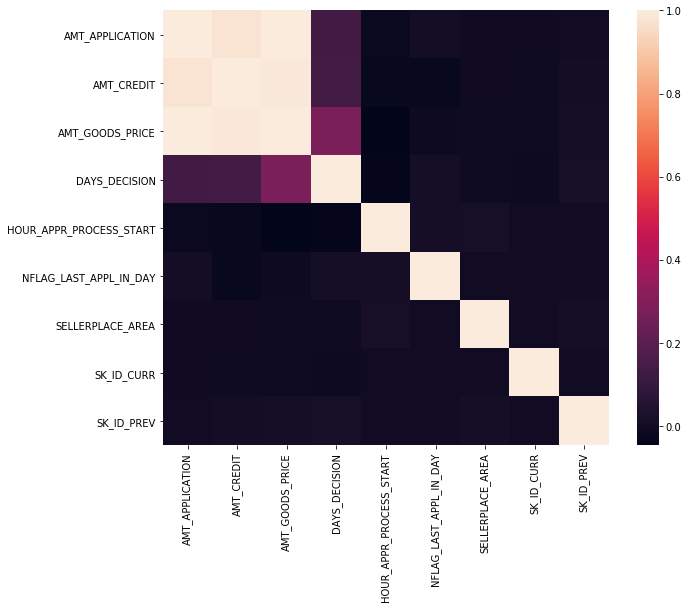

In [66]:
# Plotting a corelation matrix, 
# to get an understanding of the corelation between different variables of the dataframe.
fig, ax = plt.subplots(figsize=(10, 8))
corr = df2.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [0]:
# This is the list of important features - Add more as we finf important
# list of numerical & categorical columns 
feature_list_numerical = ['AMT_APPLICATION', 'AMT_CREDIT']
feature_list_categorical = ['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY', 'NAME_YIELD_GROUP']

<class 'str'>
<class 'str'>


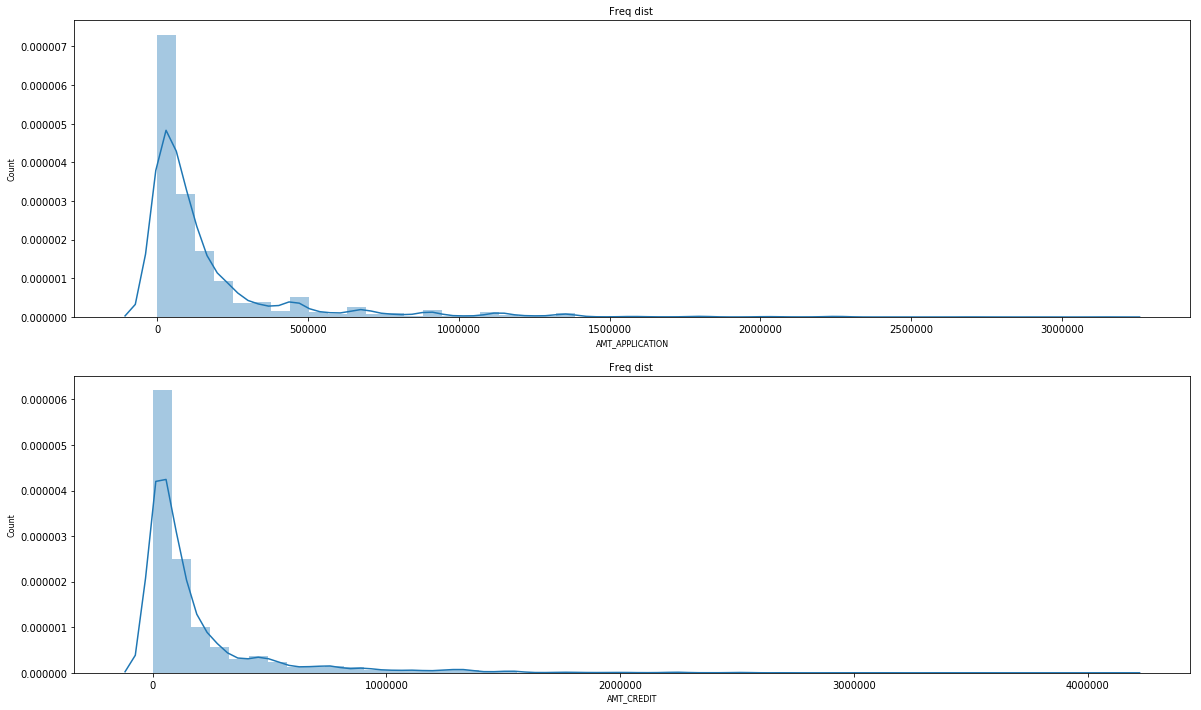

In [72]:
# Plotting the numerical variables for univariate analysis, i.e., plotting histograms to note the frequency of no. of applications filed and the no. of applications credited

fig2, ax = plt.subplots(len(feature_list_numerical), figsize=(20,12))

for i, col_val in enumerate(feature_list_numerical):
    print(type(col_val))
    sns.distplot(df2[col_val], hist=True, ax=ax[i])
    try:
        ax[i].set_title('Freq dist ', fontsize=10)
    except :
        ax[i].set_title('Freq dist ', fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

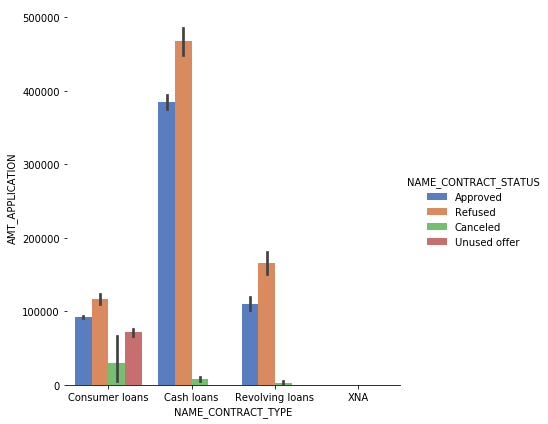

In [82]:
# Understanding the nature of categorical variables by plotting bar plots and checking the application status for a certain application amount
fig3 = sns.catplot(x="NAME_CONTRACT_TYPE", y="AMT_APPLICATION", hue="NAME_CONTRACT_STATUS", data=df2, height=6, kind="bar", palette="muted")
fig3.despine(left=True)
fig3.set_ylabels("AMT_APPLICATION")